In [15]:
# Step 1: Import and preprocess the CIFAR-10 dataset
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [16]:
# Step 2: Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.4, random_state=42)


In [17]:
# Step 3: Implement the VGG16 convolutional neural network
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Step 4: Train the CNN model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
293/293 [==============================] - 25s 63ms/step - loss: 2.3098 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.0951
Epoch 2/5
293/293 [==============================] - 16s 55ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.0951
Epoch 3/5
293/293 [==============================] - 16s 54ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.0961
Epoch 4/5
293/293 [==============================] - 16s 54ms/step - loss: 2.3027 - accuracy: 0.1014 - val_loss: 2.3030 - val_accuracy: 0.0951
Epoch 5/5
293/293 [==============================] - 16s 56ms/step - loss: 2.3026 - accuracy: 0.1009 - val_loss: 2.3030 - val_accuracy: 0.0951


In [18]:
# Step 5: Evaluate the CNN model for accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


157/157 [==============================] - 1s 9ms/step - loss: 2.3028 - accuracy: 0.0938
Test Accuracy: 0.09380000084638596


157/157 [==============================] - 2s 11ms/step


<Figure size 640x480 with 0 Axes>

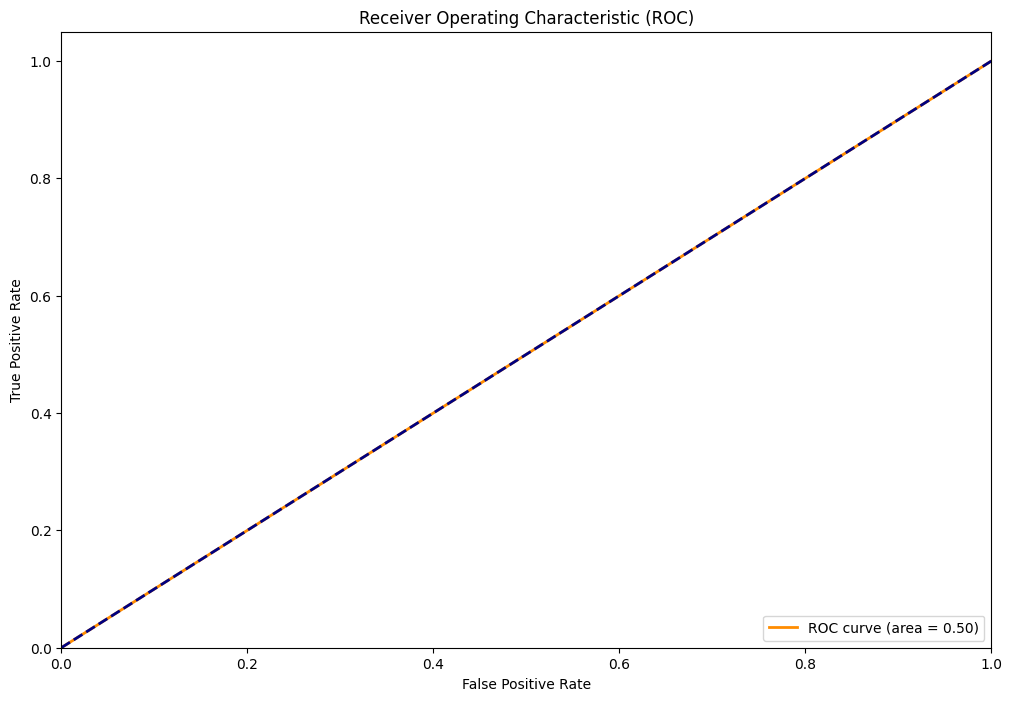

In [19]:
# Step 6: Plot ROC curve
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.figure(figsize=(12, 8))
plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


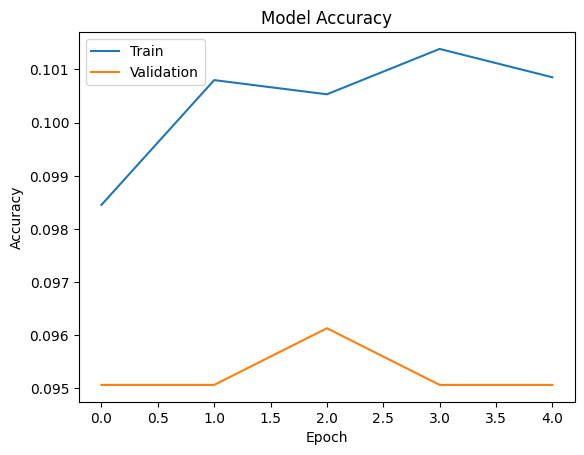

In [20]:
# Step 7: Plot epochs vs accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


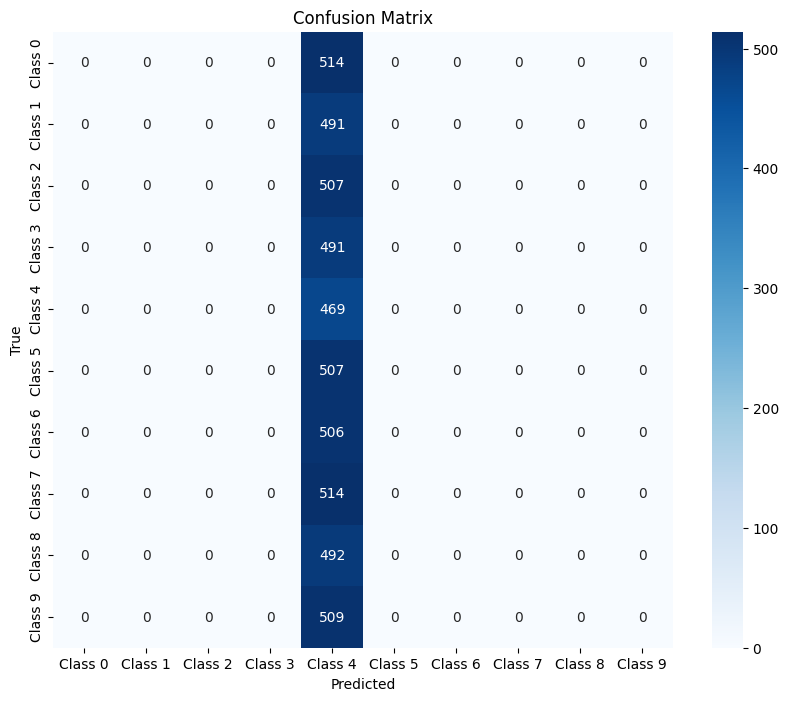

In [23]:
import numpy as np

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Define class labels
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

